# Capital Bike Sharing Project


### Importing libraries, read csf file, and data preprocessing and cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Load the dataset
df_hr = pd.read_csv('CBS_Hourly.csv',low_memory=False)
df_day = pd.read_csv('CBS_Daily.csv',low_memory=False)
# df_full = pd.read_csv('CBS_Full.csv',low_memory=False)

df_hr.head(50) 

df_hr.info()    
df_day.info()
df_hr.describe()
df_day.describe()
df_hr.tail(50) 
df_hr.duplicated().sum()



df_hr_n = df_hr.rename(columns={'Casual':'casual', 'Date':'date',	'Hour':'hour','Member':'member','Total_rides':'total_rides','relativehumidity_2m (%)': 're_humidity', 'temperature_2m (°C)':'tempt_2m','weathercode (wmo code)':'wmo_code','windspeed_10m (km/h)':'wind_speed'})
df_hr_n


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26269 non-null  float64
 1   Date                     26280 non-null  object 
 2   Hour                     26280 non-null  int64  
 3   Member                   26269 non-null  float64
 4   Total_rides              26269 non-null  float64
 5   relativehumidity_2m (%)  26280 non-null  int64  
 6   temperature_2m (°C)      26280 non-null  float64
 7   weathercode (wmo code)   26280 non-null  int64  
 8   windspeed_10m (km/h)     26280 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cas

,casual,date,hour,member,total_rides,re_humidity,tempt_2m,wmo_code,wind_speed
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9
...,...,...,...,...,...,...,...,...,...
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7


### data cleaning for hourly data


In [4]:
df_hr_n
df_hr_n.isnull().sum()
df_hr_n = df_hr_n.dropna(subset=['casual', 'member', 'total_rides']) 
df_hr_n.isnull().sum() 
# df_hr_n.isnull() 

# df_hr_n['Date'] = pd.to_datetime(df_hr_n['Date'], errors='coerce') 
df_hr_n.loc[:, 'date'] = pd.to_datetime(df_hr_n['date'], errors='coerce').dt.date
df_hr_n.isnull().sum()  
df_hr_n.duplicated().sum() 
df_hr_n

,casual,date,hour,member,total_rides,re_humidity,tempt_2m,wmo_code,wind_speed
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9
...,...,...,...,...,...,...,...,...,...
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7


### Data cleaning for daily data 

In [14]:


# df_day_n 
df_day.duplicated().sum()
df_day_n = df_day.rename(columns={	'Casual':'casual',	'Date': 'date',	'Member':'member',	'Total_rides': 'total_rides', 'apparent_temperature_mean (°C)':'apt_tempt_mean','temperature_2m_mean (°C)': 'tempt_2m_mean','weathercode (wmo code)':'wmo_code','windspeed_10m_max (km/h)':'wind_speed' })
df_day_n.isnull().sum()   
df_day_n.duplicated().sum()

df_day_clean= df_day_n.loc[:, 'date'] = pd.to_datetime(df_day_n['date'], errors='coerce').dt.date
df_day_clean.isnull().sum()
df_day_clean.duplicated().sum() 
df_day_clean = df_day_n.dropna(subset=['apt_tempt_mean', 'tempt_2m_mean', 'wmo_code', 'wind_speed', 'total_rides', 'casual', 'member', 'date'])

df_day_clean.isnull().sum() 
df_day_clean 

,casual,date,member,total_rides,apt_tempt_mean,tempt_2m_mean,wmo_code,wind_speed
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2
...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8


### Day Type Vs Total Rides


C:\Users\skyli\AppData\Local\Temp\ipykernel_16152\4229206394.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rides_by_day_type = df_day_clean.groupby('day_type')['total_rides'].sum().reindex(


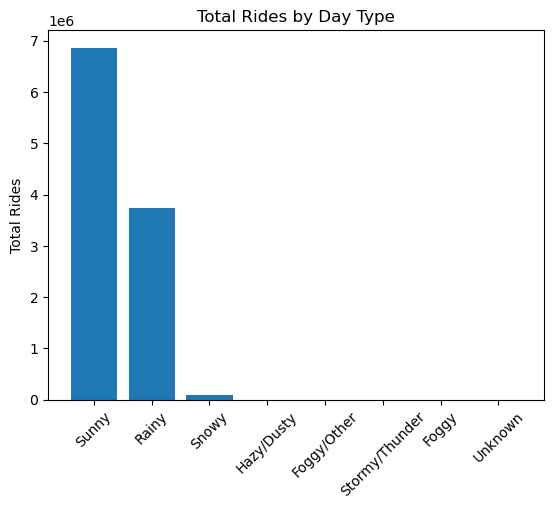

In [10]:
import matplotlib.pyplot as plt
categories = [
    'Sunny','Hazy/Dusty','Foggy/Other','Rainy',
    'Stormy/Thunder','Foggy','Snowy','Unknown'
]

# 2. Create categorical column
df_day_clean['day_type'] = pd.Categorical(
    df_day_clean['wmo_code'].apply(lambda value:
        'Sunny' if value <= 3 else
        'Hazy/Dusty' if value <= 9 else
        'Foggy/Other' if value <= 19 else
        'Rainy' if (20 <= value <= 29) or (50 <= value <= 69) else
        'Stormy/Thunder' if (30 <= value <= 35) or (80 <= value <= 99) else
        'Foggy' if 40 <= value <= 49 else
        'Snowy' if 70 <= value <= 79 else
        'Unknown'
    ),
    categories=categories,
    ordered=True
)

# Aggregate sum of rides per day_type
rides_by_day_type = df_day_clean.groupby('day_type')['total_rides'].sum().reindex(
    ['Sunny','Rainy','Snowy','Hazy/Dusty','Foggy/Other','Stormy/Thunder','Foggy','Unknown']
)

fig, ax = plt.subplots()
ax.bar(range(len(rides_by_day_type)), rides_by_day_type.values)
ax.set_xticks(range(len(rides_by_day_type)))
ax.set_xticklabels(rides_by_day_type.index, rotation=45)
plt.title('Total Rides by Day Type')
plt.ylabel('Total Rides')
plt.show()


### Weather Conditions Vs Total Rides

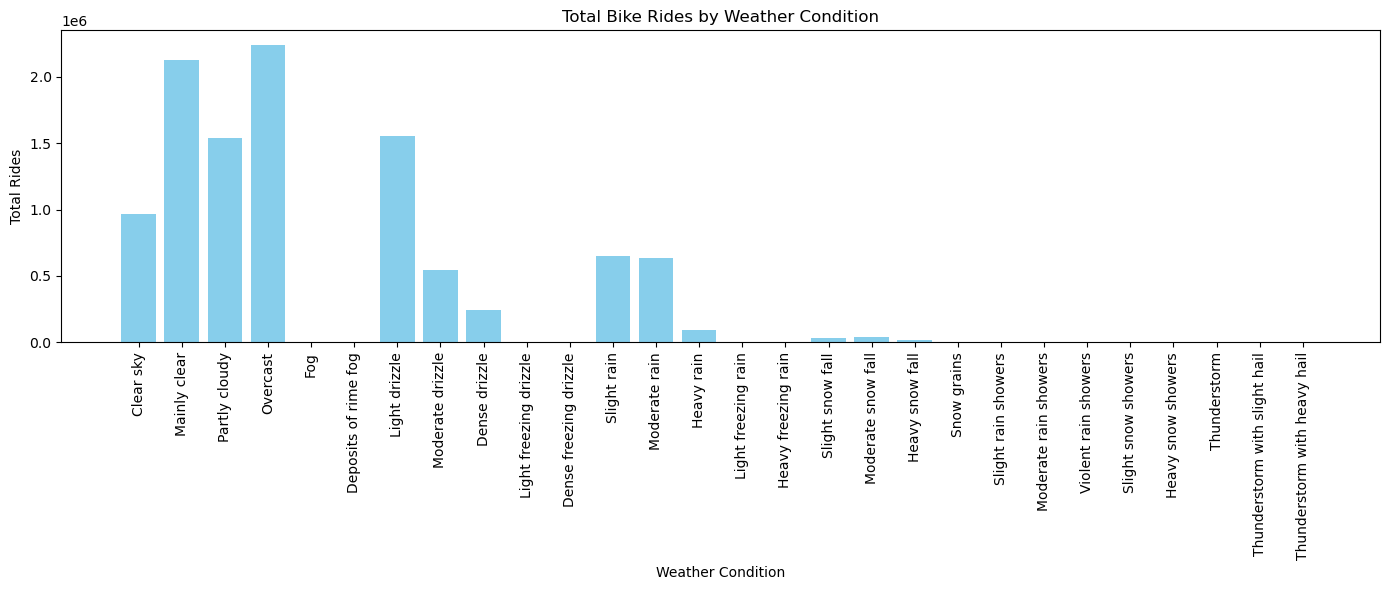

In [12]:
weather_code_map = {
    0: 'Clear sky',
    1: 'Mainly clear',
    2: 'Partly cloudy',
    3: 'Overcast',
    45: 'Fog',
    48: 'Deposits of rime fog',
    51: 'Light drizzle',
    53: 'Moderate drizzle',
    55: 'Dense drizzle',
    56: 'Light freezing drizzle',
    57: 'Dense freezing drizzle',
    61: 'Slight rain',
    63: 'Moderate rain',
    65: 'Heavy rain',
    66: 'Light freezing rain',
    67: 'Heavy freezing rain',
    71: 'Slight snow fall',
    73: 'Moderate snow fall',
    75: 'Heavy snow fall',
    77: 'Snow grains',
    80: 'Slight rain showers',
    81: 'Moderate rain showers',
    82: 'Violent rain showers',
    85: 'Slight snow showers',
    86: 'Heavy snow showers',
    95: 'Thunderstorm',
    96: 'Thunderstorm with slight hail',
    99: 'Thunderstorm with heavy hail'
}

# Map the wmo_code to descriptions
df_day_clean['weather_desc'] = df_day_clean['wmo_code'].map(weather_code_map)
df_day_clean['weather_desc'] = df_day_clean['wmo_code'].map(weather_code_map).fillna('Unknown')
rides_by_weather = df_day_clean.groupby('weather_desc', as_index=True)['total_rides'].sum()
weather_order = [weather_code_map[k] for k in weather_code_map.keys()]
rides_by_weather = rides_by_weather.reindex(weather_order).fillna(0)

plt.figure(figsize=(14,6))
plt.bar(rides_by_weather.index, rides_by_weather.values, color='skyblue')
plt.xticks(rotation=90)  # rotate for readability
plt.title('Total Bike Rides by Weather Condition')
plt.ylabel('Total Rides')
plt.xlabel('Weather Condition')
plt.tight_layout()
plt.show()


In [13]:
df_day_clean 

,casual,date,member,total_rides,apt_tempt_mean,tempt_2m_mean,wmo_code,wind_speed,weather_desc
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,Moderate rain
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,Slight rain
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,Moderate rain
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,Overcast
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,Light drizzle
...,...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1,Slight snow fall
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8,Clear sky
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5,Mainly clear
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8,Mainly clear


### Total Bike Rides by Day Type

C:\Users\skyli\AppData\Local\Temp\ipykernel_16260\2569738810.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rides_by_day_type = df_day_clean.groupby('day_type')['total_rides'].sum().reindex(categories, fill_value=0)


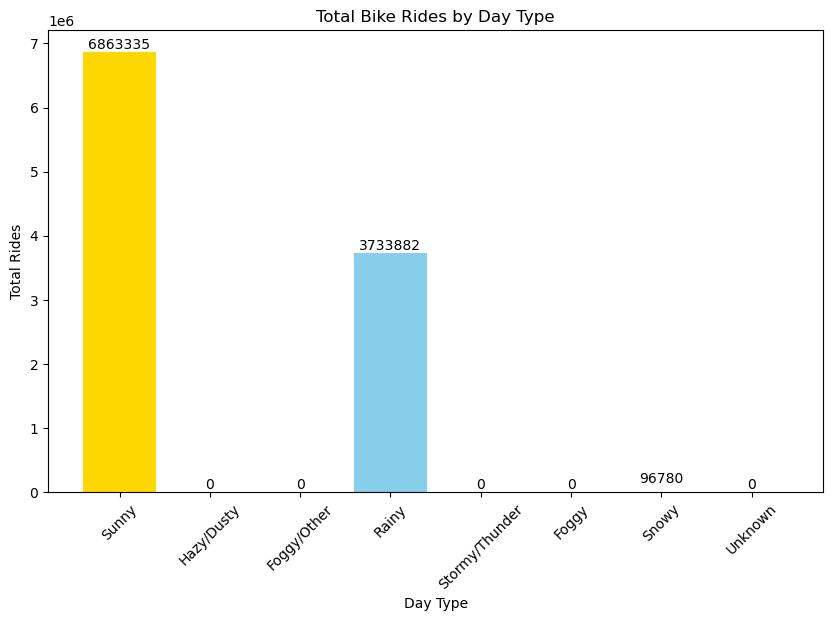

In [9]:
import matplotlib.pyplot as plt

# 1. Define categories
categories = [
    'Sunny','Hazy/Dusty','Foggy/Other','Rainy',
    'Stormy/Thunder','Foggy','Snowy','Unknown'
]

# 2. Create categorical column
df_day_clean['day_type'] = pd.Categorical(
    df_day_clean['wmo_code'].apply(lambda value:
        'Sunny' if value <= 3 else
        'Hazy/Dusty' if value <= 9 else
        'Foggy/Other' if value <= 19 else
        'Rainy' if (20 <= value <= 29) or (50 <= value <= 69) else
        'Stormy/Thunder' if (30 <= value <= 35) or (80 <= value <= 99) else
        'Foggy' if 40 <= value <= 49 else
        'Snowy' if 70 <= value <= 79 else
        'Unknown'
    ),
    categories=categories,
    ordered=True
)

# 3. Aggregate total rides per category and ensure all categories appear
rides_by_day_type = df_day_clean.groupby('day_type')['total_rides'].sum().reindex(categories, fill_value=0)


colors = ['gold', 'tan', 'gray', 'skyblue', 'purple', 'lightgray', 'white', 'black']

fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(rides_by_day_type.index, rides_by_day_type.values, color=colors)

# Add value labels on bars
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
            f'{int(bar.get_height())}', ha='center', va='bottom')

plt.title('Total Bike Rides by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)
plt.show()


In [10]:
#data cleaning 
df_hr_clean  = df_hr_n.loc[:, 'date'] = pd.to_datetime(df_hr_n['date'], errors='coerce').dt.date
df_hr_clean.isnull().sum()  
df_hr_clean.duplicated().sum()
df_hr_clean = df_hr_n.dropna(subset=['casual', 'member', 'total_rides', 're_humidity', 'tempt_2m', 'wmo_code', 'wind_speed', 'date', 'hour'])
df_hr_clean 
df_hr_clean.isnull().sum()
df_hr_clean.duplicated().sum()
df_hr_clean   
df_hr_clean = df_hr_n.dropna(subset=['casual', 'member', 'total_rides'])    
df_hr_clean.isnull().sum()   
df_hr_clean.duplicated().sum() 
df_hr_clean

# df_day_clean.isnull().sum() 



,casual,date,hour,member,total_rides,re_humidity,tempt_2m,wmo_code,wind_speed
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9
...,...,...,...,...,...,...,...,...,...
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7


### Boxplot 

Text(0.5, 1.0, 'Total Rides by Weather Code')

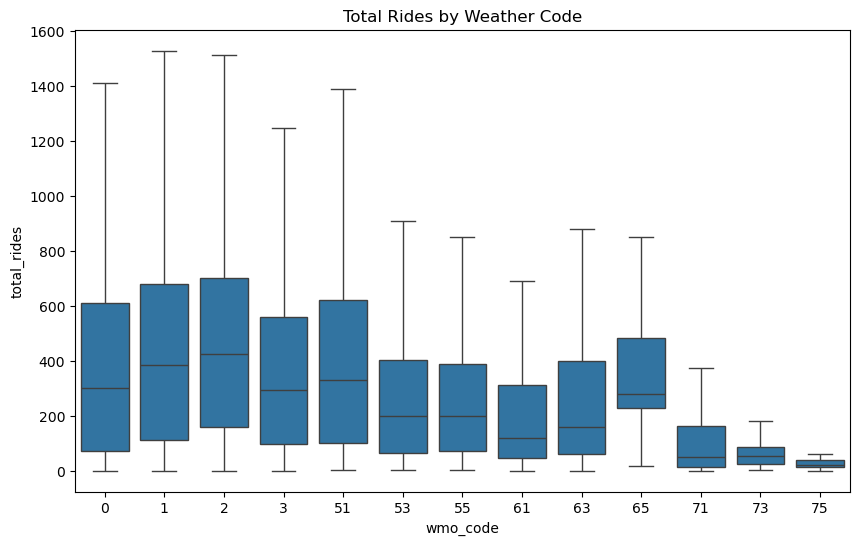

In [11]:
#data visualization for df_hr using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hr_clean, x='wmo_code', y='total_rides',showfliers=False)        
plt.title('Total Rides by Weather Code')


Text(0.5, 1.0, 'Total Rides by Weather Code')

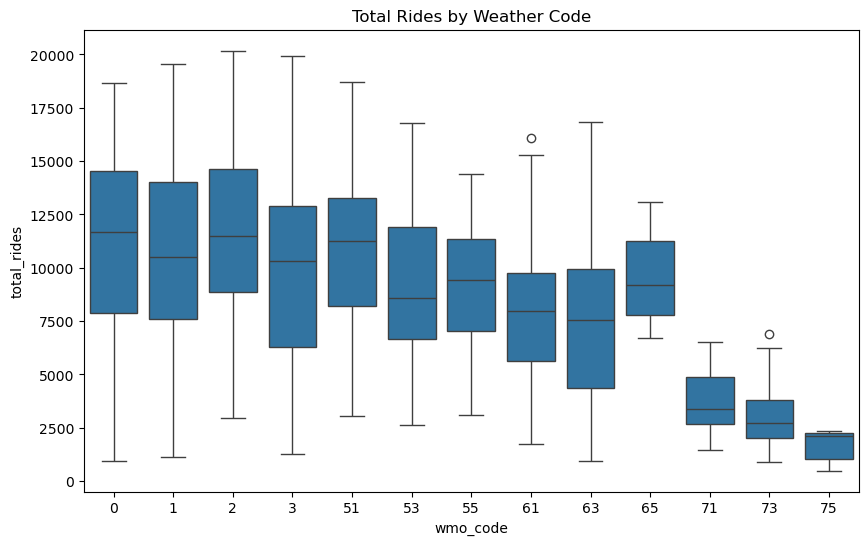

In [12]:
#data visualization for daily data
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_day_clean, x='wmo_code', y='total_rides')        
plt.title('Total Rides by Weather Code')


### Total Rides by Month and Weather Code

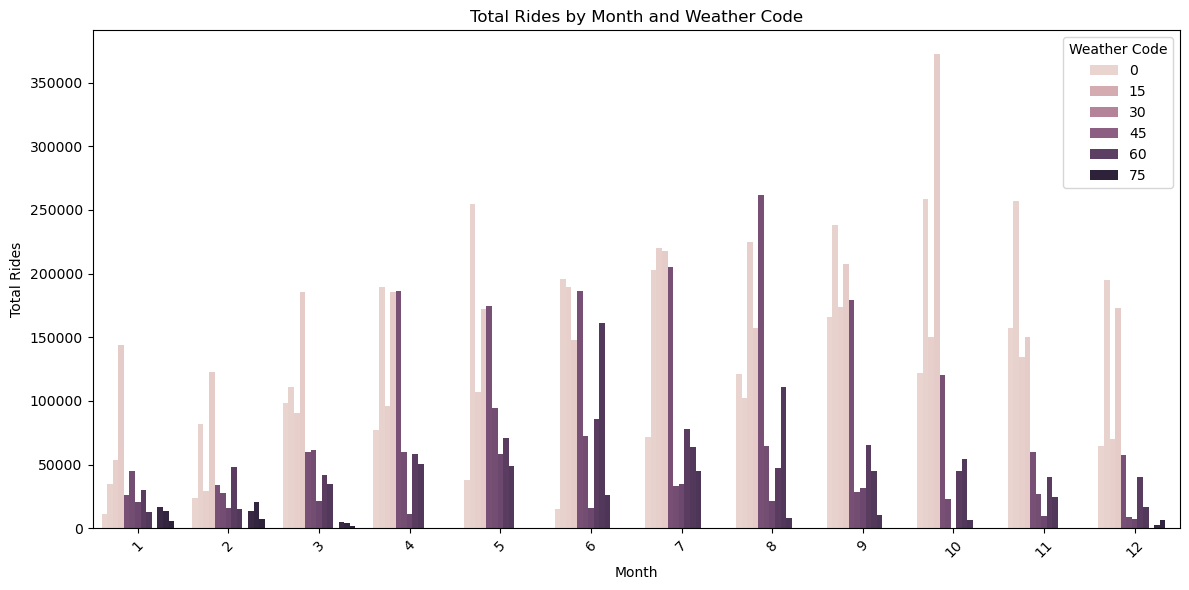

In [13]:
#visualization for df_day_clean using barplot with month 

df_day_clean['date'] = pd.to_datetime(df_day_clean['date'], errors='coerce')
df_day_clean

#  extract the month
df_day_clean['month'] = df_day_clean['date'].dt.month

#  Aggregate total rides per month & weather code
monthly_data = df_day_clean.groupby(['month','wmo_code'], as_index=False)['total_rides'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_data, x='month', y='total_rides', hue='wmo_code', order=range(1,13))
plt.title('Total Rides by Month and Weather Code')
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.legend(title='Weather Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Total Rides by month and Weather Code from Daily Data

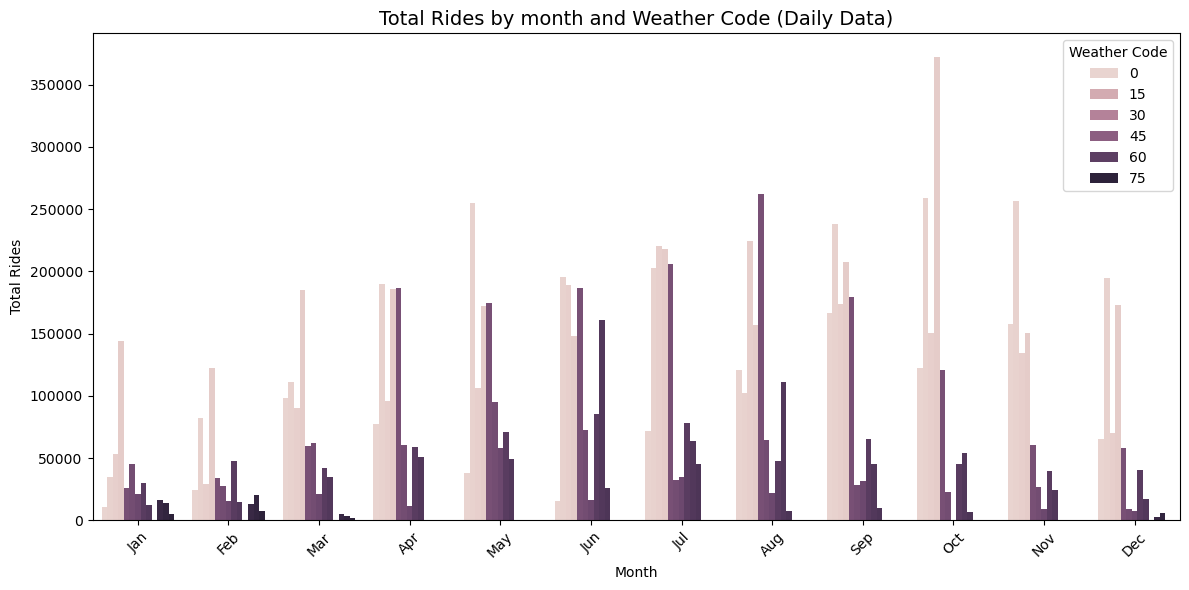

months found in data: ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Convert Date column to datetime (auto-detects day first if needed)
df_day_n['date'] = pd.to_datetime(df_day_n['date'], errors='coerce', dayfirst=True)

# 2. Drop rows where the date could not be parsed
df_day_n = df_day_n.dropna(subset=['date'])

# 3. Extract month as short name (Jan, Feb, etc.)
df_day_n['month'] = df_day_n['date'].dt.month_name().str[:3]

# 4. Aggregate total rides per month and weather code
monthly_data = df_day_n.groupby(['month', 'wmo_code'], as_index=False)['total_rides'].sum()

# 5. Determine which months exist in the dataset (in chronological order)
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
present_months = [m for m in month_order if m in monthly_data['month'].unique()]

# 6. Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=monthly_data,
    x='month', y='total_rides', hue='wmo_code',
    order=present_months
)

plt.title('Total Rides by month and Weather Code (Daily Data)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.legend(title='Weather Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Optional: Print which months actually exist in your dataset
print("months found in data:", present_months)


In [55]:
df_day_clean

,casual,date,member,total_rides,apt_tempt_mean,tempt_2m_mean,wmo_code,wind_speed,day_type,weather_desc,month,is_holiday
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,Holiday,Moderate rain,1,True
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,Normal,Slight rain,1,False
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,Normal,Moderate rain,1,False
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,Normal,Overcast,1,False
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,Normal,Light drizzle,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1,Normal,Slight snow fall,12,False
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8,Normal,Clear sky,12,False
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5,Normal,Mainly clear,12,False
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8,Normal,Mainly clear,12,False


### Total Rides by Session: Morning,Afternoon,Evening,Night

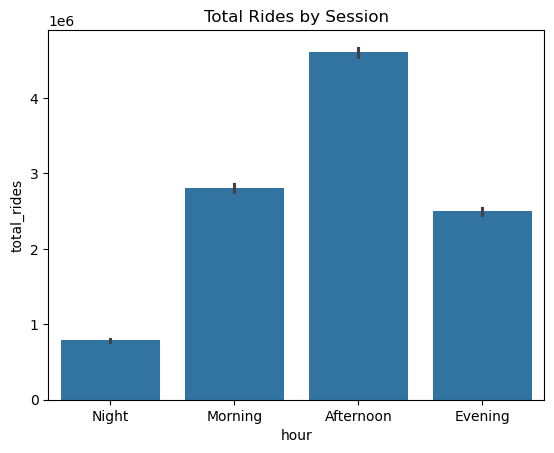

In [16]:
sns.barplot(
    x=df_hr_clean['hour'].apply(
        lambda h: (
            'Morning' if 5 <= h <= 11 else
            'Afternoon' if 12 <= h <= 17 else
            'Evening' if 18 <= h <= 21 else
            'Night'
        )
    ),
    y='total_rides',
    data=df_hr_clean,
    estimator=sum,
    order=['Night', 'Morning', 'Afternoon', 'Evening']
)
plt.title('Total Rides by Session')
plt.show()


### Total Bike Rides: Weekday vs Weekend

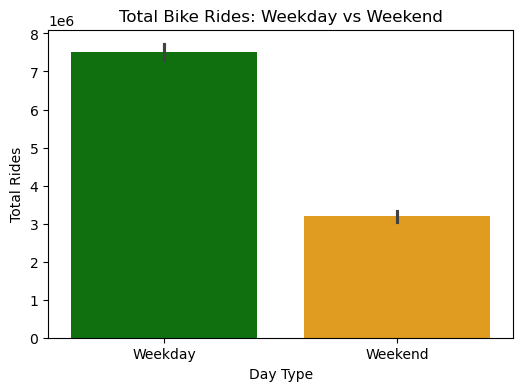

In [17]:

# extracting weekend and weekdays
weekend = df_day_clean['date'].dt.dayofweek.apply(
    lambda x: 'Weekend' if x >= 5 else 'Weekday'
)

# Plot barplot of total rides by Weekend/Weekday
plt.figure(figsize=(6,4))
sns.barplot(
    x = weekend,
    y='total_rides',
    data=df_day_clean,
    estimator=sum,
    order=['Weekday', 'Weekend'],
    palette=['Green', 'Orange'],   
    hue = weekend, 
    legend = False   
)
plt.title('Total Bike Rides: Weekday vs Weekend')
plt.ylabel('Total Rides')
plt.xlabel('Day Type')
plt.grid(False)
plt.show()


C:\Users\skyli\AppData\Local\Temp\ipykernel_16260\3921077149.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Member Type')


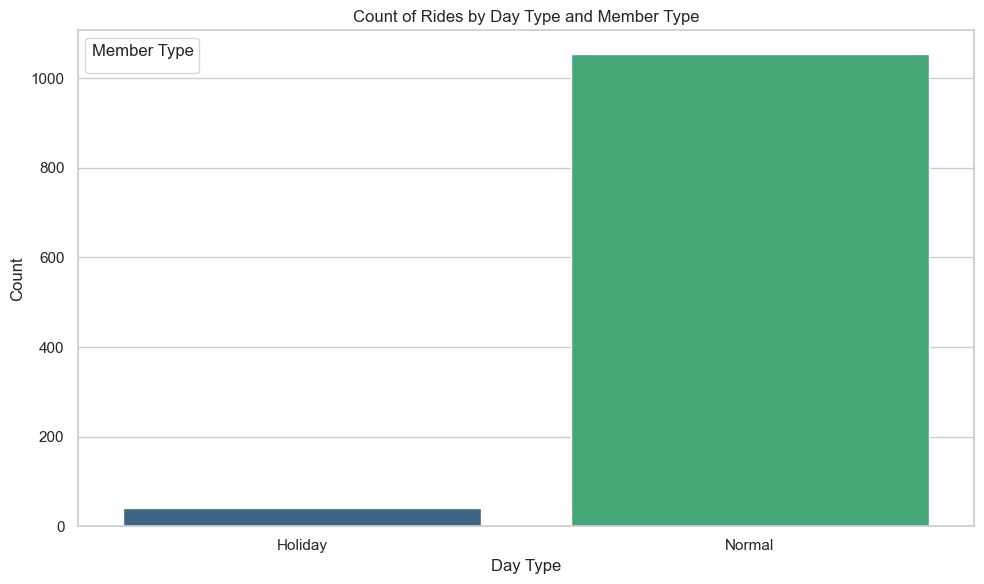

In [57]:
# Daily Trend: weekdays vs weekends and registered users vs casual users for df_day_clean
plt.figure(figsize=(10, 6))
sns.countplot(data=df_day_clean, x='day_type', hue='day_type', palette='viridis') 
plt.title('Count of Rides by Day Type and Member Type')
plt.xlabel('Day Type')
plt.ylabel('Count')
plt.legend(title='Member Type') 
plt.tight_layout()
plt.show()  

### Total Bike Rides: Holiday vs Normal Day

C:\Users\skyli\AppData\Local\Temp\ipykernel_16260\3859726421.py:9: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_day_clean['is_holiday'] = df_day_clean['date'].isin(country_holidays)
C:\Users\skyli\AppData\Local\Temp\ipykernel_16260\3859726421.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_holiday_summary, x='day_type', y='total_rides', palette='viridis')


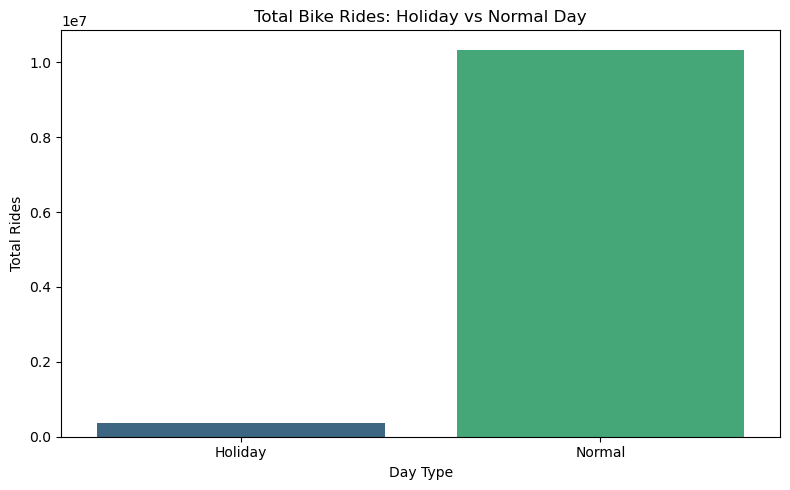

In [18]:
import holidays


df_day_clean['date'] = pd.to_datetime(df_day_n['date'], errors='coerce', dayfirst=True)
# Generating holiday list
country_holidays = holidays.US(years=[2021, 2022, 2023])

# holiday flag
df_day_clean['is_holiday'] = df_day_clean['date'].isin(country_holidays)

# Create readable day type column
df_day_clean['day_type'] = df_day_clean['is_holiday'].apply(lambda x: 'Holiday' if x else 'Normal')

# Aggregate total rides per day type
df_holiday_summary = df_day_clean.groupby('day_type', as_index=False)['total_rides'].sum()

# Barplot of total rides
plt.figure(figsize=(8,5))
sns.barplot(data=df_holiday_summary, x='day_type', y='total_rides', palette='viridis')
plt.title('Total Bike Rides: Holiday vs Normal Day')
plt.xlabel('Day Type')
plt.ylabel('Total Rides')
plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

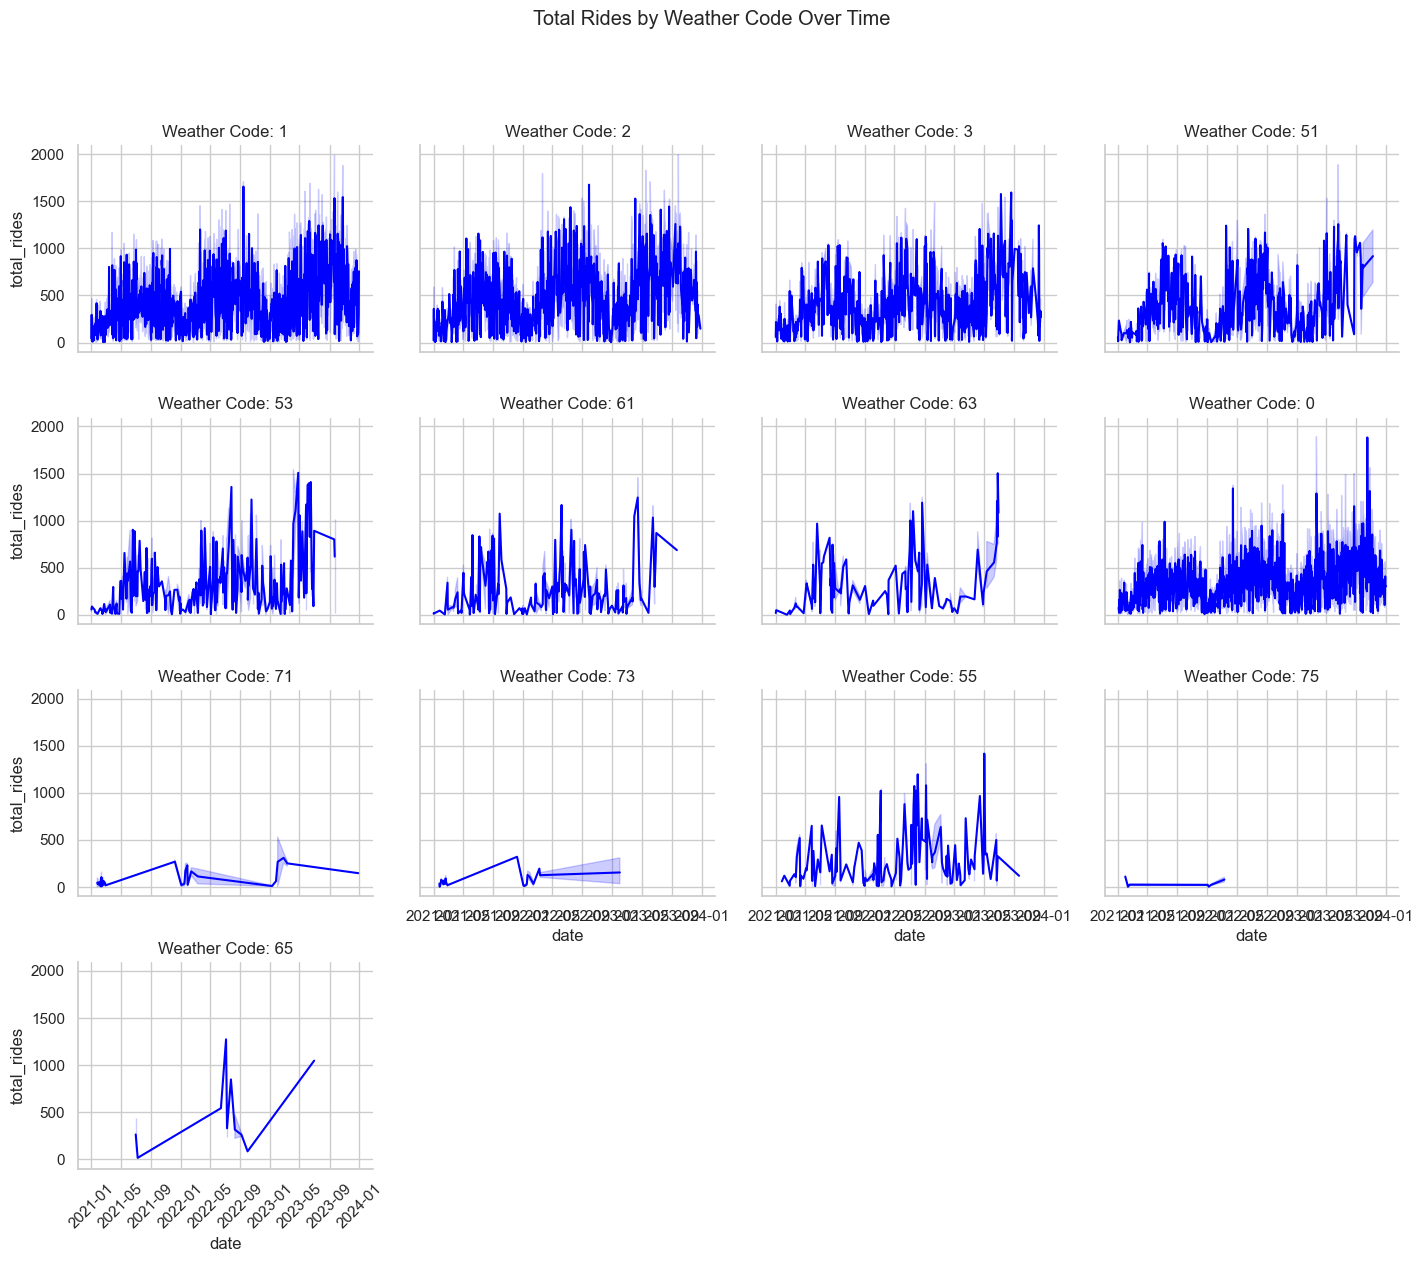

In [16]:
df_hr_n 
#data visualization using facetgrid for horuly data with weather code,total rides and date
plt.figure(figsize=(15, 10))
sns.set_theme(style="whitegrid")                        
df_hr_n['wmo_code'] = df_hr_n['wmo_code'].astype(str)  # Ensure wmo_code is treated as a string
df_hr_n['date'] = pd.to_datetime(df_hr_n['date'], errors='coerce')  
        
g = sns.FacetGrid(df_hr_n, col='wmo_code', col_wrap=4, height=3, aspect=1.2)    
g.map(sns.lineplot, 'date', 'total_rides', color='blue')
g.set_titles("Weather Code: {col_name}")
g.fig.suptitle("Total Rides by Weather Code Over Time", y=1.05)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






In [ ]:
df_day_n

,Casual,Date,Member,Total_rides,apt_tempt_mean,tempt_2m_mean,wmo_code,wind_speed
0,371,2021-01-01 00:00:00,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-01 00:00:00,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-01 00:00:00,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-01 00:00:00,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-01 00:00:00,2004,3061,1.4,4.0,51,9.2
...,...,...,...,...,...,...,...,...
1090,646,2021-02-15 00:00:00,1934,2580,-8.6,-4.3,71,10.1
1091,3099,2021-02-15 00:00:00,4819,7918,-7.0,-2.5,0,12.8
1092,3491,2021-02-15 00:00:00,5168,8659,-7.8,-3.9,1,9.5
1093,3097,2021-02-15 00:00:00,4497,7594,-7.3,-2.9,1,13.8


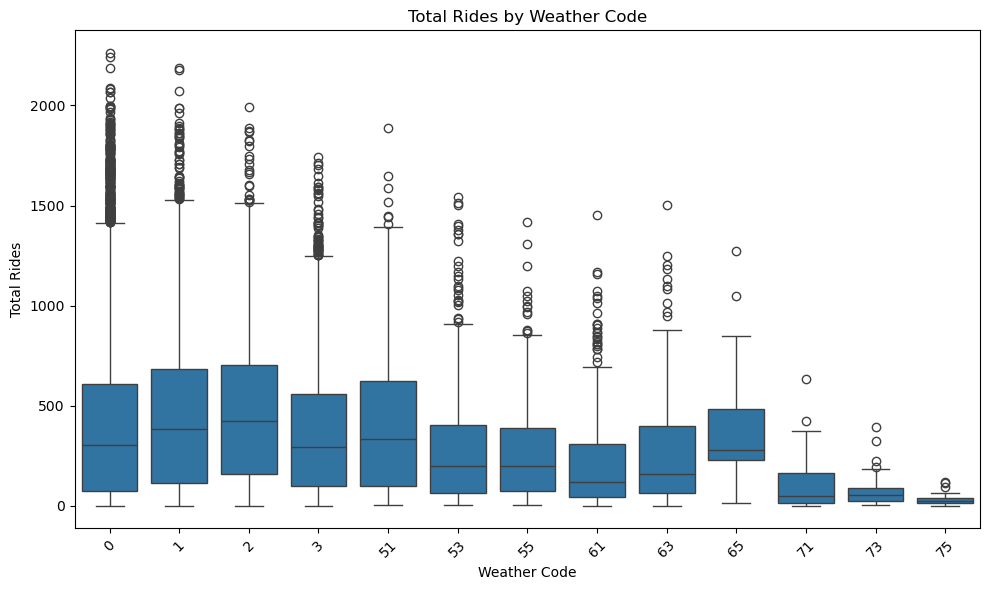

In [ ]:
#data visualization 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hr_n, x='wmo_code', y='Total_rides')        
plt.title('Total Rides by Weather Code')
plt.xlabel('Weather Code')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  
# df = pd.read_csv("/Users/ms/Desktop/CAB/Datasets/BikeShare/Datasets/CBS_2021_2023/CBS_2021-2023_Full.csv")

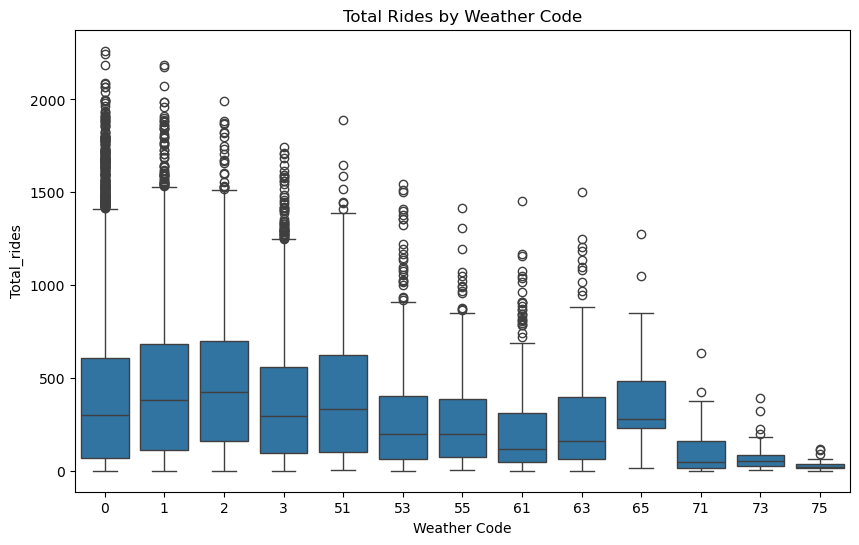

In [ ]:
#visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hr_n, x='wmo_code', y='Total_rides')    
# --- IGNORE ---
plt.title('Total Rides by Weather Code')
plt.xlabel('Weather Code')  
plt.show()  


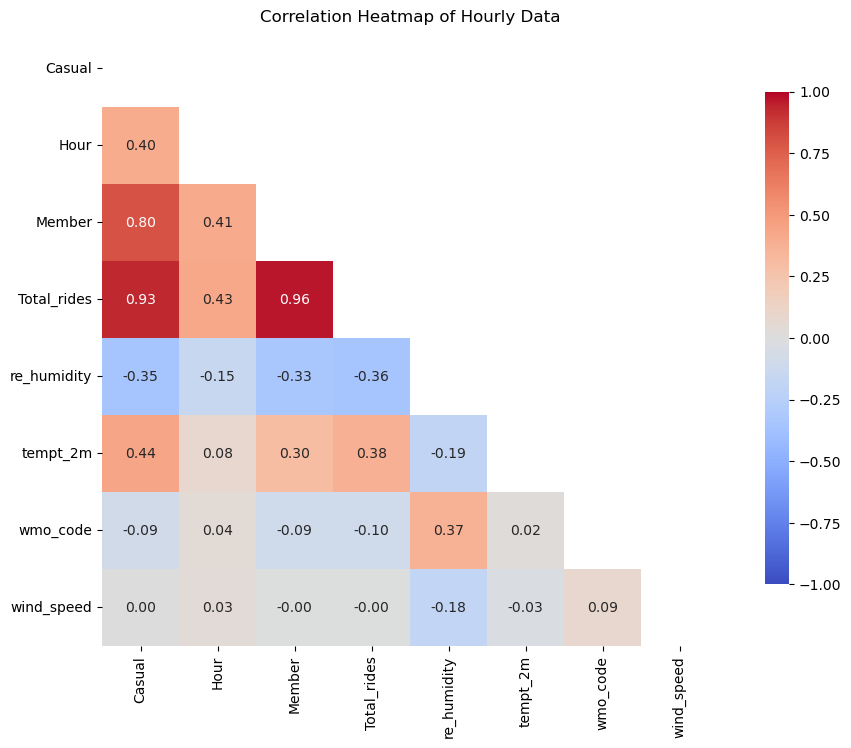

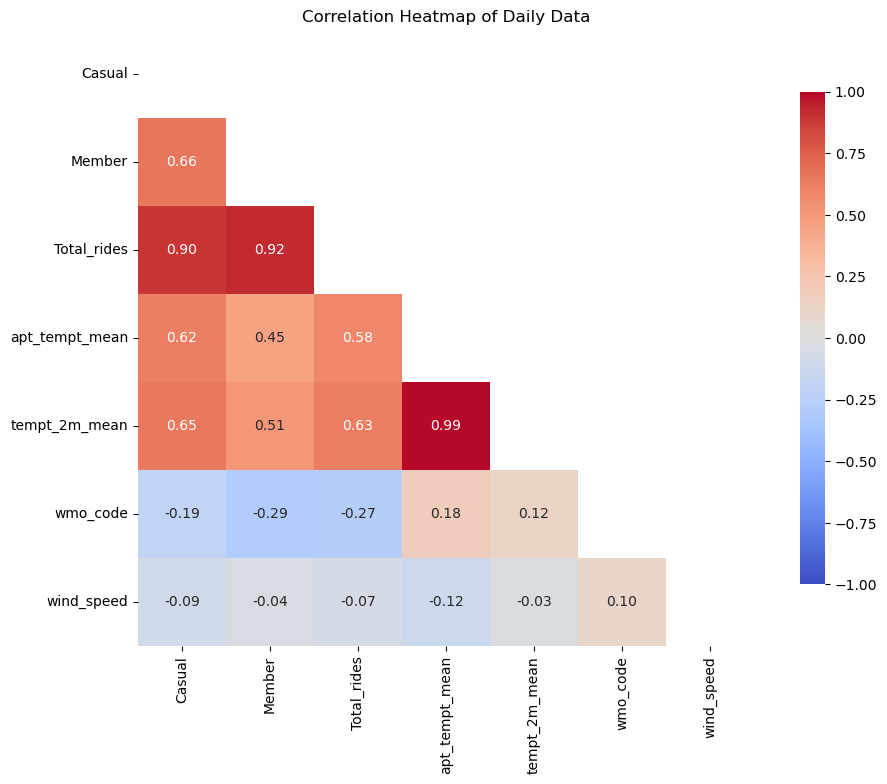

In [ ]:
#visualization using heatmap    
#  Select only numeric columns
numeric_df = df_hr_n.select_dtypes(include=['float64', 'int64'])

#  correlation
corr_matrix = numeric_df.corr()

# heatmap
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',mask=mask, fmt='.2f',vmax=1, vmin=-1, square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Hourly Data')
plt.show()

#visualization using heatmap for df_day
#  Select only numeric columns
numeric_df_day = df_day_n.select_dtypes(include=['float64', 'int64'])   
#  correlation
corr_matrix_day = numeric_df_day.corr()
# heatmap
plt.figure(figsize=(12, 8))
mask_day = np.triu(np.ones_like(corr_matrix_day, dtype=bool))   
sns.heatmap(corr_matrix_day, annot=True, cmap='coolwarm', mask=mask_day, fmt='.2f', vmax=1, vmin=-1, square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Daily Data')
plt.show()  

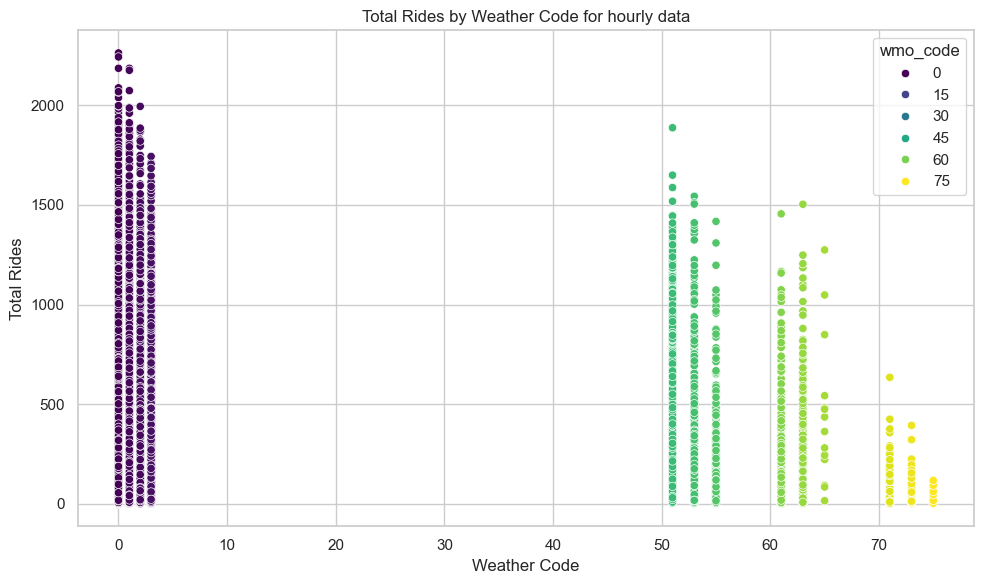

In [ ]:
#visualization of relationship between 'Total_rides' and 'wmo_code'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_hr_clean, x='wmo_code', y='Total_rides', hue='wmo_code', palette='viridis') 
plt.title('Total Rides by Weather Code for hourly data')
plt.xlabel('Weather Code')
plt.ylabel('Total Rides')   
plt.tight_layout()
plt.show()  

In [51]:
df_day_clean


,casual,date,member,total_rides,apt_tempt_mean,tempt_2m_mean,wmo_code,wind_speed,day_type,weather_desc,month,is_holiday
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,Holiday,Moderate rain,1,True
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,Normal,Slight rain,1,False
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,Normal,Moderate rain,1,False
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,Normal,Overcast,1,False
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,Normal,Light drizzle,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1,Normal,Slight snow fall,12,False
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8,Normal,Clear sky,12,False
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5,Normal,Mainly clear,12,False
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8,Normal,Mainly clear,12,False


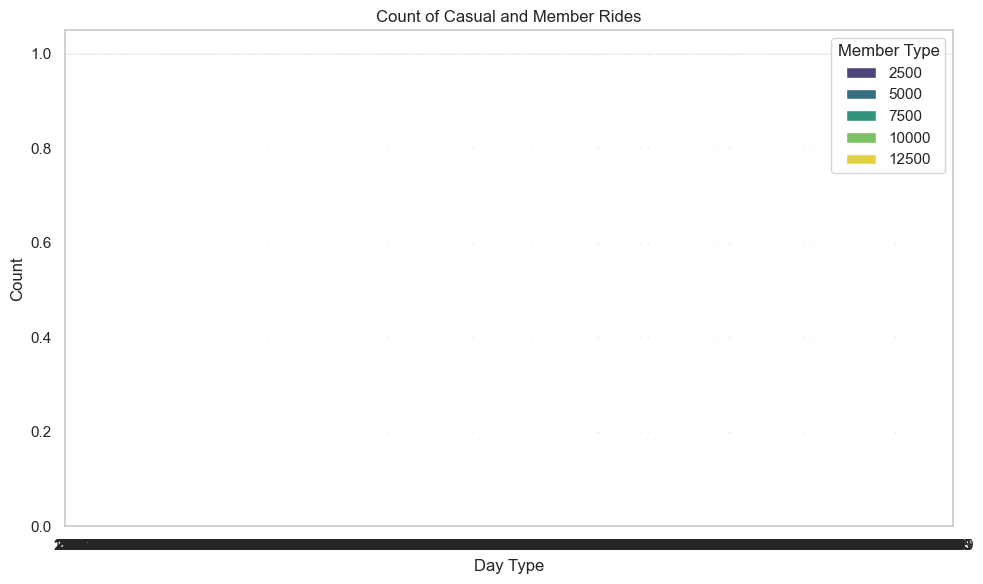

In [54]:
#visualization from day data
#visualization of casual,memmbers and total rides using countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_day_clean, x='casual', hue='member', palette='viridis')   
plt.title('Count of Casual and Member Rides')
plt.xlabel('Day Type')
plt.ylabel('Count')
plt.legend(title='Member Type') 
plt.tight_layout()
plt.show()


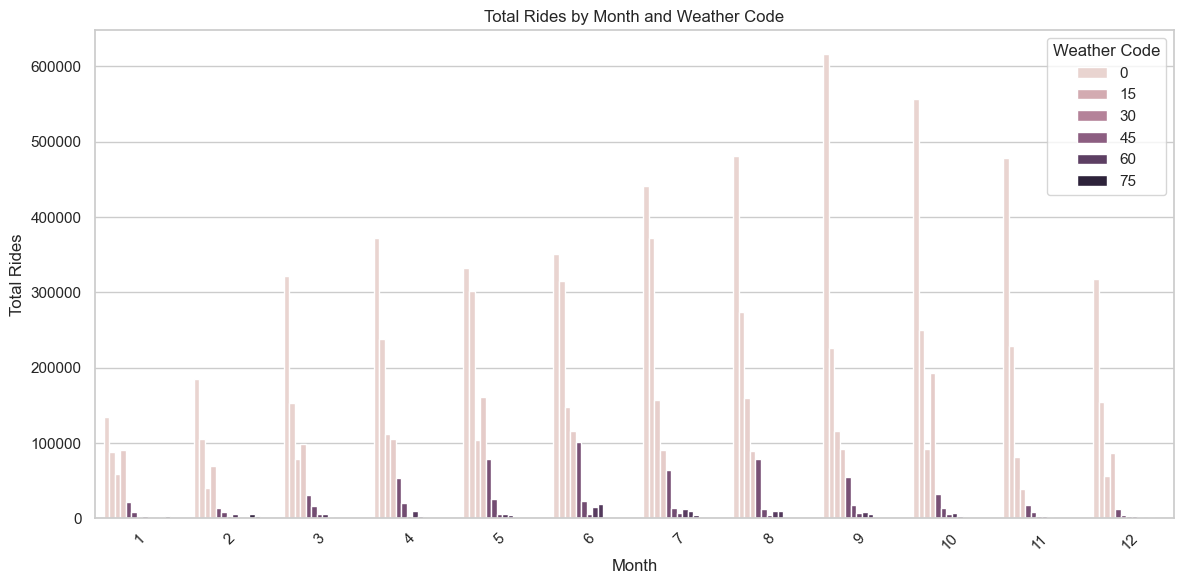

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ensure Date is datetime
df_hr_clean['Date'] = pd.to_datetime(df_hr_clean['Date'], errors='coerce', dayfirst=True)

# 2. Extract month (numeric or name)
df_hr_clean['Month'] = df_hr_clean['Date'].dt.month  # 1 to 12

# 3. Aggregate total rides by month & weather
monthly_data = df_hr_clean.groupby(['Month', 'wmo_code'], as_index=False)['Total_rides'].sum()

# 4. Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_data, x='Month', y='Total_rides', hue='wmo_code', order=range(1,13))
plt.title('Total Rides by Month and Weather Code')
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.legend(title='Weather Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Data Cleaning and Visualization with Full Data 

### importing all the lirbaries 

In [20]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [21]:
df_full = pd.read_csv('CBS_Full.csv',low_memory= False)
df_full.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member


In [19]:
df_full

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693992,1E69FA72F720F2E7,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955.0,Market Square / King St & Royal St,31042.0,38.806002,-77.055911,38.804718,-77.043363,member
10693993,BA9E9FDBFAFDE618,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.884185,-76.995396,38.890461,-76.988355,member
10693994,F3B6C6BFB1F738D0,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,22nd & P ST NW,31285.0,23rd & E St NW,31260.0,38.909394,-77.048728,38.896104,-77.049882,casual
10693995,D2DB18DB58BC83D2,classic_bike,2023-12-31 23:59:30,2024-01-01 02:02:07,22nd & P ST NW,31285.0,22nd & P ST NW,31285.0,38.909394,-77.048728,38.909394,-77.048728,casual


In [23]:
df_full.info()
print('Info of the dataframe\n:','\n' )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1.0+ GB
Info of the dataframe
: 



### Minimizing the momory space step by step

In [24]:
# Check unique values before conversion
unique_values_before = df_full.nunique()
print("Unique values before conversion:\n", unique_values_before, '\n')

Unique values before conversion:
 ride_id               10693997
rideable_type                3
started_at             9649173
ended_at               9638365
start_station_name         860
start_station_id          1321
end_station_name           865
end_station_id            1338
start_lat               570110
start_lng               617671
end_lat                 173835
end_lng                 183886
member_casual                2
dtype: int64 



In [25]:
# Check Memory usage before converting
memory_usage = df_full.memory_usage(deep=True)
print("Memory Usage before Converting dtypes:\n", memory_usage, '\n')

Memory Usage before Converting dtypes:
 Index                       132
ride_id               695109805
rideable_type         654238494
started_at            727191796
ended_at              727191796
start_station_name    740478725
start_station_id      580968994
end_station_name      736905216
end_station_id        579326908
start_lat              85551976
start_lng              85551976
end_lat                85551976
end_lng                85551976
member_casual         588169835
dtype: int64 



In [26]:
# Copy the dataframe
df_full_n = df_full.copy()

# Convert categorical columns to category type for memory efficiency
df_full_n["rideable_type"] = df_full_n["rideable_type"].astype("category")
df_full_n["start_station_name"] = df_full_n["start_station_name"].astype("category")
df_full_n["end_station_name"] = df_full_n["end_station_name"].astype("category")
df_full_n["member_casual"] = df_full_n["member_casual"].astype("category")

# Convert started_at and ended_at to datetime for memory efficiency
df_full_n['started_at'] = pd.to_datetime(df_full_n['started_at'])
df_full_n['ended_at'] = pd.to_datetime(df_full_n['ended_at'])

# Regenerate the entire ride_id column with sequential integers and convert it
# to a memory-efficient data type (uint32)
df_full_n['ride_id'] = pd.Series(range(1, len(df_full_n) + 1), dtype='uint32')

In [27]:
# Check info and dtypes after conversion
info_after = df_full_n.info()
print("Info of the DataFrame after conversion:\n", info_after, '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             uint32        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  category      
 5   start_station_id    object        
 6   end_station_name    category      
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
dtypes: category(4), datetime64[ns](2), float64(4), object(2), uint32(1)
memory usage: 754.8+ MB
Info of the DataFrame after conversion:
 None 



In [28]:
# Check unique values after conversion
unique_values_after = df_full_n.nunique()
print("Unique values after conversion:\n", unique_values_after, '\n')

Unique values after conversion:
 ride_id               10693997
rideable_type                3
started_at             9649173
ended_at               9638365
start_station_name         860
start_station_id          1321
end_station_name           865
end_station_id            1338
start_lat               570110
start_lng               617671
end_lat                 173835
end_lng                 183886
member_casual                2
dtype: int64 



In [29]:
# Check memory usage after all conversions
print("Memory Usage after Converting dtype:\n", df_full_n.memory_usage(deep=True), '\n')

Memory Usage after Converting dtype:
 Index                       132
ride_id                42775988
rideable_type          10694288
started_at             85551976
ended_at               85551976
start_station_name     21485201
start_station_id      580968994
end_station_name       21485559
end_station_id        579326908
start_lat              85551976
start_lng              85551976
end_lat                85551976
end_lng                85551976
member_casual          10694215
dtype: int64 



In [30]:
# Calculate how much we reduced the in-memory footprint of the dataset
reduction = df_full_n.memory_usage(deep=True).sum() / df_full.memory_usage(deep=True).sum()
print(f"We reduced the in-memory footprint of the dataset to {reduction:.2f} of its original size.")

We reduced the in-memory footprint of the dataset to 0.28 of its original size.


In [31]:
df_full_n.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64

In [32]:
df_full_clean = df_full_n.dropna()
df_full_clean.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [33]:
df_full_clean.duplicated().sum()

0

In [34]:
df_full_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,1,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
2,3,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,4,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,5,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member
6,7,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,38.867373,-76.988039,casual


### Data Visualization


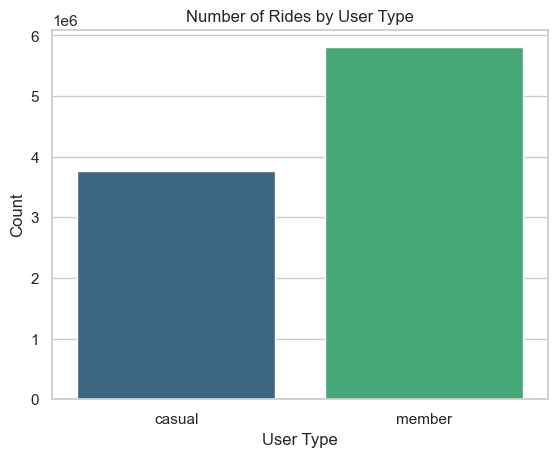

In [50]:
sns.countplot(data=df_full_clean, x='member_casual', palette='viridis',hue = 'member_casual')
plt.title('Number of Rides by User Type')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()  


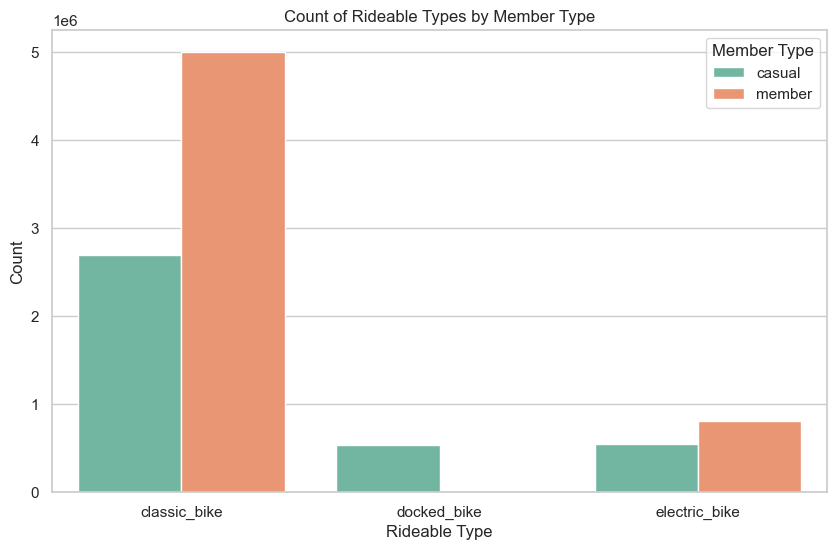

In [40]:
# data  visualisation using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df_full_clean, x='rideable_type', hue='member_casual', palette='Set2')   
plt.title('Count of Rideable Types by Member Type')
plt.xlabel('Rideable Type')
plt.ylabel('Count')
plt.legend(title='Member Type') 
plt.show()  

C:\Users\skyli\AppData\Local\Temp\ipykernel_16260\2708029576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_clean['started_at'] = pd.to_datetime(df_full_clean['started_at'])
C:\Users\skyli\AppData\Local\Temp\ipykernel_16260\2708029576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_clean['ended_at'] = pd.to_datetime(df_full_clean['ended_at'])
C:\Users\skyli\AppData\Local\Temp\ipykernel_16260\2708029576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

Text(0.5, 1.0, 'Ride Duration by User Type')

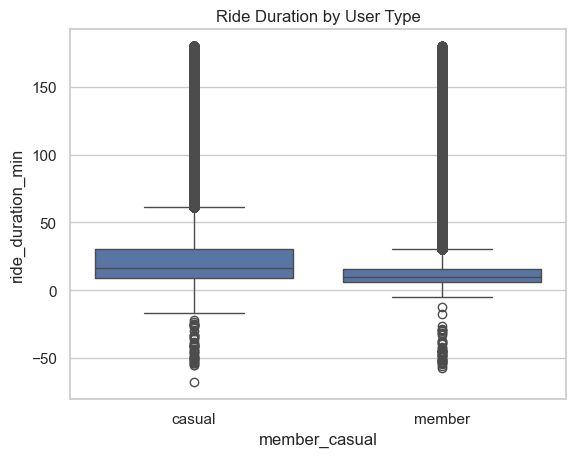

In [60]:
df_full_clean['started_at'] = pd.to_datetime(df_full_clean['started_at'])
df_full_clean['ended_at'] = pd.to_datetime(df_full_clean['ended_at'])
df_full_clean['ride_duration_min'] = (df_full_clean['ended_at'] - df_full_clean['started_at']).dt.total_seconds() / 60
df_full_clean = df_full_clean[df_full_clean['ride_duration_min'] < 180]  # remove outliers
sns.boxplot(data=df_full_clean, x='member_casual', y='ride_duration_min')
plt.title('Ride Duration by User Type')


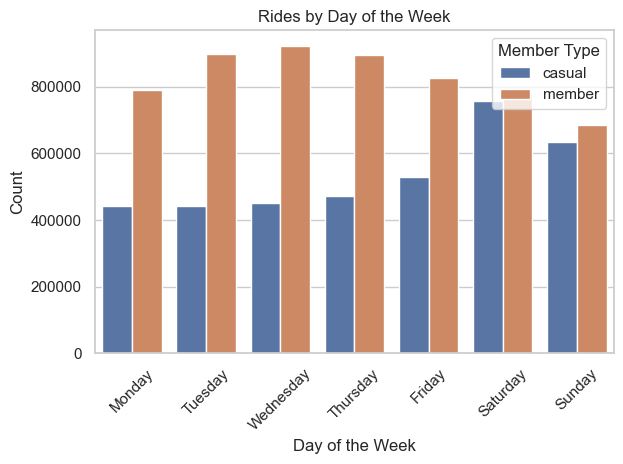

In [62]:
# Ride per week  
df_full_clean['weekday'] = df_full_clean['started_at'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df_full_clean, x='weekday', hue='member_casual', order=weekday_order)
plt.title('Rides by Day of the Week')
plt.xlabel('Day of the Week')   
plt.ylabel('Count')
plt.legend(title='Member Type') 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  

In [17]:
df_full_clean

NameError: name 'df_full_clean' is not defined